In [1]:
#data dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from nltk import tokenize
from keras.preprocessing.text import Tokenizer

In [2]:
df1=pd.read_csv('train_essays.csv')

In [3]:
df2=pd.read_excel('AI ESSAY.xlsx')

In [4]:
df2.head()

,id,prompt_id,text,generated
0,0,0,Introduction\n\nThe idea of car-free cities is...,1
1,0,0,Introduction\n\nCar-free cities are a concept ...,1
2,0,0,Introduction\n\nThe concept of car-free cities...,1
3,0,0,"In recent years, there has been a growing move...",1
4,0,0,The concept of car-free cities is increasingly...,1


In [5]:
df=pd.concat([df1,df2], ignore_index=True)
df.shape

(2784, 4)

In [6]:
df['prompt_id'].value_counts()

0    1430
1    1354
Name: prompt_id, dtype: int64

In [7]:
df['generated'].value_counts()

1    1409
0    1375
Name: generated, dtype: int64

In [8]:
df.sample(10)

,id,prompt_id,text,generated
1947,0,0,"In recent years, the concept of car-free citie...",1
1746,0,0,In an era of growing environmental concerns an...,1
1843,0,0,The automobile has been a cornerstone of subur...,1
208,28d4b384,1,Since our beautiful country was born we've alw...,0
1423,0,0,The Advantages of Embracing Car-Free Cities\n\...,1
1885,0,0,The automobile has been a defining feature of ...,1
283,38d14015,1,"Dear, Senator I'am a conserend voter that beli...",0
2261,0,1,"Dear Senator,\n\nI am writing to you today to ...",1
822,948d0f4b,0,As we get older we want to travel to more plac...,0
1198,deb50259,0,Cars make it exceptionally easy to travel and ...,0


In [9]:
df.shape

(2784, 4)

In [10]:
df=df.drop(['id','prompt_id'], axis=1)
df.columns

Index(['text', 'generated'], dtype='object')

In [11]:
df.shape

(2784, 2)

In [12]:
## NEURAL NETWORKS ##

In [13]:
### using LSTM

In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
max_sequence_length = max(len(sequence) for sequence in X)
X_padded = pad_sequences(X, maxlen=max_sequence_length)
X_padded_3D = X_padded.reshape(X_padded.shape[0], X_padded.shape[1], 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded_3D,df['generated'], test_size=0.2,  random_state=0)

In [32]:
X_padded_3D.shape

(2784, 1364, 1)

In [18]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

18783

In [19]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_sequence_length))
model.add(LSTM(units=120, dropout=0.3, recurrent_dropout=0.3,return_sequences=True))
model.add(LSTM(units=60, dropout=0.1, recurrent_dropout=0.1, return_sequences=True))
model.add(LSTM(units=30, dropout=0.05, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1364, 50)          939150    
                                                                 
 lstm (LSTM)                 (None, 1364, 120)         82080     
                                                                 
 lstm_1 (LSTM)               (None, 1364, 60)          43440     
                                                                 
 lstm_2 (LSTM)               (None, 30)                10920     
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 1075621 (4.10 MB)
Trainable params: 1075621 (4.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
63/63 [==============================] - 639s 10s/step - loss: 0.2544 - accuracy: 0.8752 - val_loss: 0.0452 - val_accuracy: 0.9910
Epoch 2/5
63/63 [==============================] - 683s 11s/step - loss: 0.0332 - accuracy: 0.9915 - val_loss: 0.0131 - val_accuracy: 0.9955
Epoch 3/5
63/63 [==============================] - 712s 11s/step - loss: 0.0093 - accuracy: 0.9990 - val_loss: 0.0630 - val_accuracy: 0.9865
Epoch 4/5
63/63 [==============================] - 756s 12s/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.0125 - val_accuracy: 0.9955
Epoch 5/5
63/63 [==============================] - 768s 12s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000


In [ ]:
y_prob=model.predict(X_test)

In [ ]:
y_prob

In [ ]:
y_pred = (y_prob > 0.5).astype(int)
y_pred

In [62]:
df4=pd.read_excel('Book1.xlsx')
df4.head()

,Sr. No.,text,generated
0,1,Mahatma Gandhi: The Architect of Nonviolent Re...,1
1,2,The Evolving Landscape of Energy in 2023\n\nIn...,1
2,3,Market Trends and the Bitcoin Phenomenon\n\nIn...,1
3,4,The Dynamic Landscape of the Indian Market\n\n...,1
4,5,The Prospects of a Future Global Conflict\n\nI...,1


In [63]:
df4['text']

0     Mahatma Gandhi: The Architect of Nonviolent Re...
1     The Evolving Landscape of Energy in 2023\n\nIn...
2     Market Trends and the Bitcoin Phenomenon\n\nIn...
3     The Dynamic Landscape of the Indian Market\n\n...
4     The Prospects of a Future Global Conflict\n\nI...
5     ChatGPT: Revolutionizing Conversational AI\n\n...
6     The Future of Greenery: Nurturing a Sustainabl...
7     The Evolution and Impact of Laptops and Comput...
8     Fire Safety and Life Safety: Building a Secure...
9     The Beautiful Game: Exploring the Global Pheno...
10    Bridging the Generation Gap: Understanding the...
11    The Marvel of Life: A Comprehensive Exploratio...
12    Title: Python: The Versatile Serpent of Progra...
13    The Python: Nature's Enigmatic Constrictor\n\n...
14    Title: The Intricate Tapestry of Life: A Celeb...
15    Title: Earth: Our Fragile Oasis\n\nIntroductio...
16    Title: The Essence of Data in the Digital Age\...
17    Title: "WhatsApp: Transforming Communicati

In [64]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df4['text'])
X = tokenizer.texts_to_sequences(df4['text'])
max_sequence_length = max(len(sequence) for sequence in X)
X_padded = pad_sequences(X, maxlen=max_sequence_length)
X_padded = X_padded.reshape(X_padded.shape[0], X_padded.shape[1], 1)

In [65]:
X_padded.shape

(20, 605, 1)

In [ ]:
y_test.value_counts()

In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
y_pred

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9946140035906643

In [66]:
from tensorflow.keras.models import load_model
#model.save('model.h5')
# Load the saved model
#Project_model_lstm = load_model('model.h5')

# Assuming you have new, unseen data (X_new_padded) to make predictions on
y_prob = Project_model_lstm.predict(X_padded)
y_pred = (y_prob > 0.5).astype(int)

# Print or use the predictions as needed
print("Predicted Probabilities:")
print(y_pred)

1/1 [==============================] - 0s 334ms/step
Predicted Probabilities:
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]


In [54]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:50])
    print('Pred:', y_pred_class[0:50])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    #print('Cross-validated AUC:', cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict(X_test)[0:10]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict(X_test)[:]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of text')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    #y_pred_class = binarize(y_pred_prob, 0.5)
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for text classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

Accuracy: 0.9946140035906643
Null accuracy:
 0    286
1    271
Name: generated, dtype: int64
Percentage of ones: 0.4865350089766607
Percentage of zeros: 0.5134649910233393
True: [1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0
 0 1 1 1 0 1 1 0 1 0 0 0 1]
Pred: [[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]


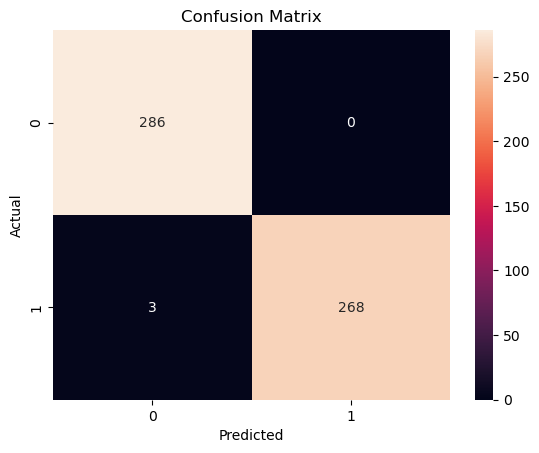

Classification Accuracy: 0.9946140035906643
Classification Error: 0.0053859964093356805
False Positive Rate: 0.0
Precision: 1.0
AUC Score: 0.9944649446494465
18/18 [==============================] - 12s 657ms/step
First 10 predicted responses:
 [[0.99810636]
 [0.0043177 ]
 [0.00284562]
 [0.99835753]
 [0.00332771]
 [0.00321074]
 [0.9984499 ]
 [0.00377013]
 [0.9983283 ]
 [0.00282007]]
18/18 [==============================] - 13s 714ms/step
First 10 predicted probabilities of class members:
 [[0.99810636]
 [0.0043177 ]
 [0.00284562]
 [0.99835753]
 [0.00332771]
 [0.00321074]
 [0.9984499 ]
 [0.00377013]
 [0.9983283 ]
 [0.00282007]]
18/18 [==============================] - 12s 698ms/step
First 10 predicted probabilities:
 [[0.99810636]
 [0.0043177 ]
 [0.00284562]
 [0.99835753]
 [0.00332771]
 [0.00321074]
 [0.9984499 ]
 [0.00377013]
 [0.9983283 ]
 [0.00282007]]


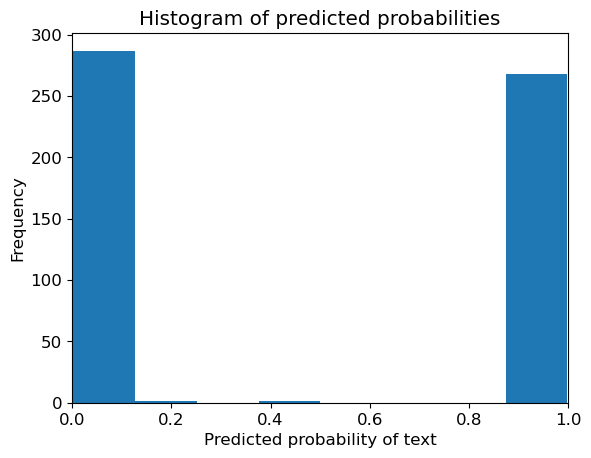

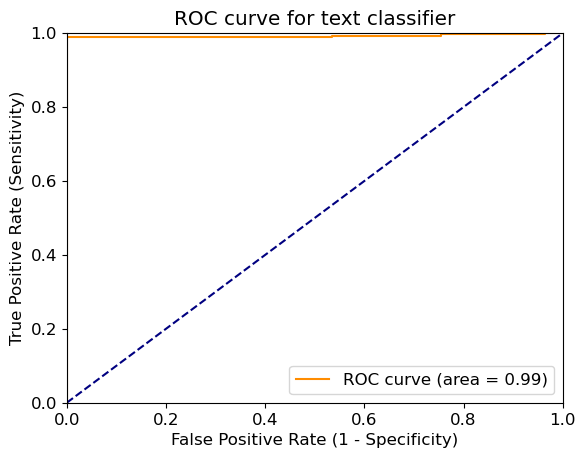

[[286   0]
 [  3 268]]


In [55]:
accuracy_score = evalClassModel(model, y_test, y_pred, True)